In [1]:
import pandas as pd
data = pd.read_csv(r"C:\Users\ms900\OneDrive\Desktop\crime analysis\crime_data_analysis.csv")
print(data)

      Record ID  Year         District        Crime_Type Victim_Gender  \
0             1  2020            Salem      Sexual Crime          Male   
1             2  2017            Salem       Cyber Crime         Other   
2             3  2024  Tiruchirappalli    Property Crime          Male   
3             4  2021  Tiruchirappalli      Sexual Crime        Female   
4             5  2018          Chennai  Economic Offense          Male   
...         ...   ...              ...               ...           ...   
2995       2996  2022          Madurai  Economic Offense          Male   
2996       2997  2019         Dindigul     Violent Crime         Other   
2997       2998  2018          Chennai  Economic Offense          Male   
2998       2999  2016            Erode       Cyber Crime        Female   
2999       3000  2022         Dindigul       Cyber Crime        Female   

     Time_of_Incident Location_Type  Number_of_Accused Reported_To_Police  \
0             Morning         Urba

In [2]:
data.head(10)

,Record ID,Year,District,Crime_Type,Victim_Gender,Time_of_Incident,Location_Type,Number_of_Accused,Reported_To_Police,Crime_Severity
0,1,2020,Salem,Sexual Crime,Male,Morning,Urban,3,Yes,Moderate
1,2,2017,Salem,Cyber Crime,Other,Morning,Rural,2,Yes,Low
2,3,2024,Tiruchirappalli,Property Crime,Male,Evening,Urban,3,No,Low
3,4,2021,Tiruchirappalli,Sexual Crime,Female,Morning,Urban,5,No,High
4,5,2018,Chennai,Economic Offense,Male,Morning,Rural,1,No,Low
5,6,2020,Erode,Property Crime,Other,Morning,Rural,3,Yes,Low
6,7,2023,Thoothukudi,Property Crime,Female,Afternoon,Urban,5,No,Low
7,8,2016,Madurai,Violent Crime,Female,Evening,Urban,3,Yes,Moderate
8,9,2020,Coimbatore,Sexual Crime,Other,Afternoon,Urban,5,Yes,Moderate
9,10,2024,Madurai,Violent Crime,Other,Evening,Urban,2,Yes,Low


 ## Data Preparation & Cleaning

In [3]:
print(data.isnull().sum())

Record ID             0
Year                  0
District              0
Crime_Type            0
Victim_Gender         0
Time_of_Incident      0
Location_Type         0
Number_of_Accused     0
Reported_To_Police    0
Crime_Severity        0
dtype: int64


In [4]:
print(data.dtypes)

Record ID              int64
Year                   int64
District              object
Crime_Type            object
Victim_Gender         object
Time_of_Incident      object
Location_Type         object
Number_of_Accused      int64
Reported_To_Police    object
Crime_Severity        object
dtype: object


In [5]:
data = data.drop_duplicates()

## Data Exploration & Classification

In [6]:
print(data['Crime_Type'].value_counts())

Crime_Type
Sexual Crime        673
Property Crime      603
Economic Offense    593
Cyber Crime         574
Violent Crime       557
Name: count, dtype: int64


In [7]:
print(data['Year'].value_counts().sort_index())

Year
2014    290
2015    273
2016    281
2017    268
2018    294
2019    271
2020    266
2021    277
2022    268
2023    280
2024    232
Name: count, dtype: int64


In [8]:
violent = ['Sexual Crime', 'Violent Crime']
data['Crime_Category'] = data['Crime_Type'].apply(lambda x: 'Violent' if x in violent else 'Non-Violent')

## Trend Analysis

In [12]:
# Aggregate by Year
yearly_trends = data.groupby('Year').size()
print(yearly_trends)

Year
2014    290
2015    273
2016    281
2017    268
2018    294
2019    271
2020    266
2021    277
2022    268
2023    280
2024    232
dtype: int64


In [22]:
# Aggregate by District
district_trends = data.groupby('District').size()
print(district_trends)

District
Chennai            303
Coimbatore         273
Dindigul           293
Erode              303
Madurai            314
Salem              278
Thoothukudi        302
Tiruchirappalli    303
Tirunelveli        302
Vellore            329
dtype: int64


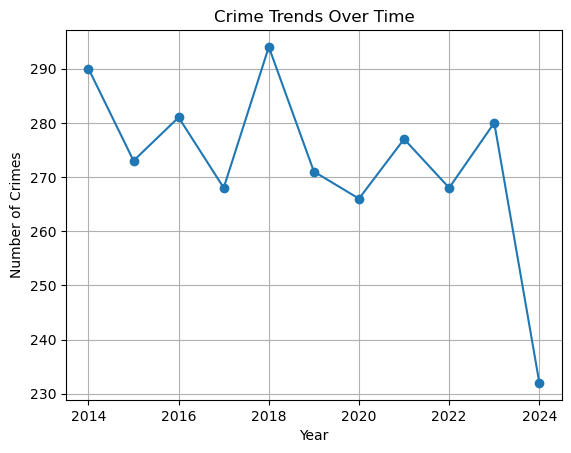

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
# Count crimes per year
yearly_trends = data.groupby('Year').size()

# Line chart for crime trends
plt.plot(yearly_trends.index, yearly_trends.values, marker='o')
plt.title('Crime Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()

### Classify Crimes Based on Their Nature

In [26]:
# Group crimes into broader categories
# Define groups
violent = ['Sexual Crime', 'Violent Crime']
property_crimes = ['Property Crime', 'Economic Offense']
cyber = ['Cyber Crime']

def classify(crime):
    if crime in violent:
        return 'Violent'
    elif crime in property_crimes:
        return 'Property'
    elif crime in cyber:
        return 'Cyber'
    else:
        return 'Other'

data['Crime_Category'] = data['Crime_Type'].apply(classify)

# Show count by category
print(data['Crime_Category'].value_counts())

Crime_Category
Violent     1230
Property    1196
Cyber        574
Name: count, dtype: int64


## Generate Innovative Statistical Charts

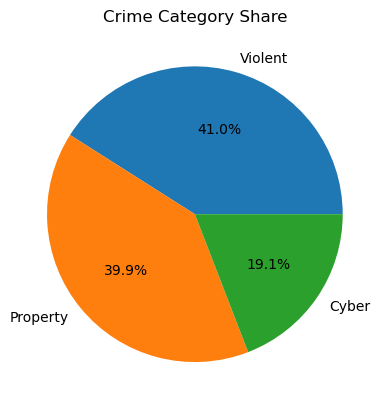

In [28]:
# Pie Chart by Crime Category
data['Crime_Category'].value_counts().plot.pie(autopct='%1.1f%%', title='Crime Category Share')
plt.ylabel('')
plt.show()

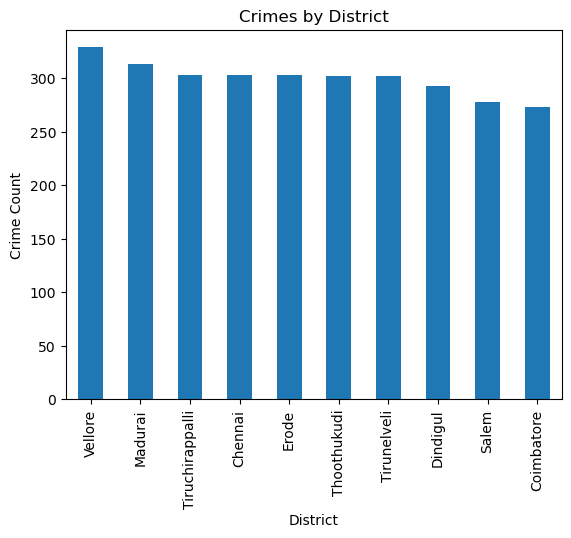

In [30]:
# Bar Chart by District
data['District'].value_counts().plot.bar(title='Crimes by District')
plt.xlabel('District')
plt.ylabel('Crime Count')
plt.show()

In [36]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


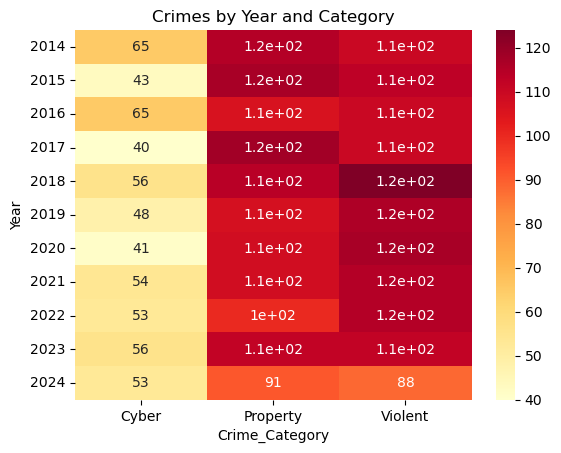

In [37]:
# Heatmap of Year vs. Crime Category
import seaborn as sns
pivot = data.pivot_table(index='Year', columns='Crime_Category', aggfunc='size', fill_value=0)
sns.heatmap(pivot, annot=True, cmap='YlOrRd')
plt.title('Crimes by Year and Category')
plt.show()

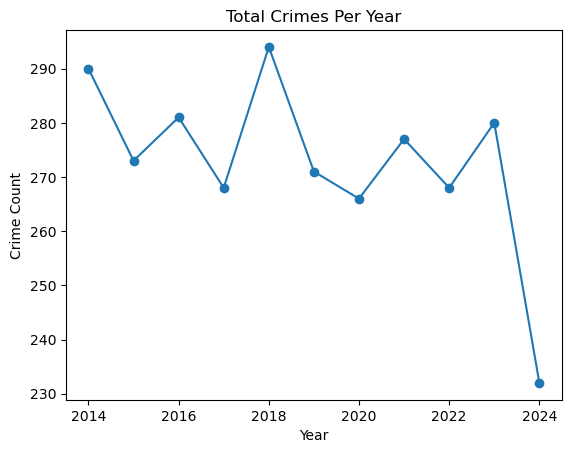

In [14]:
import matplotlib.pyplot as plt
yearly_trends.plot(kind='line', marker='o', title='Total Crimes Per Year')
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.show()

 ## Correlation & Insight Discovery


In [15]:
#Correlate Crime Severity with Reporting
pd.crosstab(data['Crime_Severity'], data['Reported_To_Police'])

Reported_To_Police,No,Yes
Crime_Severity,,
High,344,159
Low,378,565
Moderate,650,528
Very High,82,23
Very Low,57,214


## Innovative Statistical Charts

### Crime Type Distribution Pie Chart

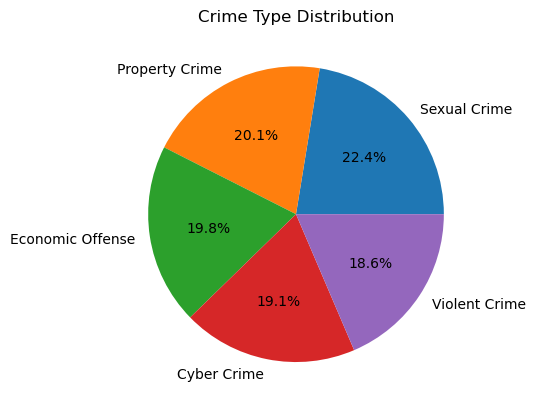

In [18]:
data['Crime_Type'].value_counts().plot.pie(autopct='%1.1f%%', title='Crime Type Distribution')
plt.ylabel('')
plt.show()

### District-wise Bar Chart

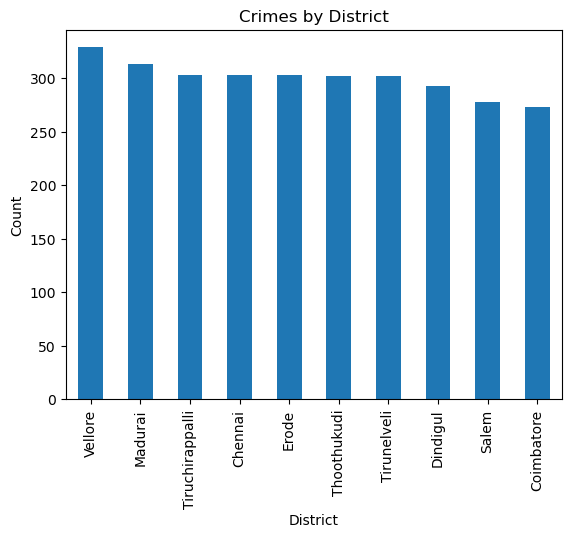

In [20]:
data['District'].value_counts().plot.bar(title='Crimes by District')
plt.xlabel('District')
plt.ylabel('Count')
plt.show()

In [38]:
# Correlation between 'Number_of_Accused' and 'Crime_Severity' 
data['Crime_Severity_Num'] = data['Crime_Severity'].map({'Low': 1, 'Moderate': 2, 'High': 3})
print(data[['Number_of_Accused', 'Crime_Severity_Num']].corr())


                    Number_of_Accused  Crime_Severity_Num
Number_of_Accused            1.000000            0.334544
Crime_Severity_Num           0.334544            1.000000


In [39]:
# Crosstab for reporting by severity
print(pd.crosstab(data['Crime_Severity'], data['Reported_To_Police']))

Reported_To_Police   No  Yes
Crime_Severity              
High                344  159
Low                 378  565
Moderate            650  528
Very High            82   23
Very Low             57  214


 ## Provide critical insights and control suggestions